# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [ ]:
!pip install --user --upgrade tables
!pip install --user pycaret

In [ ]:
# !pip install pycaret[full]==2.3.4
!pip install pycaret

In [ ]:
# Install or upgrade required libraries
!pip install pandas scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [ ]:
region=2
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
322,2992543,Pingkian,Kayapa,Nueva Vizcaya,0.182622,0.686499,0.712950,1.0,0,1,1,3010498,26.642827,25.748240,18.119120,257.482080,115.866960,67.231440,49.58912,0.654438
1578,3027107,Guino (Giayan),Nagtipunan,Quirino,0.035906,1.662370,0.563307,1.0,0,1,1,3010498,44.097676,4.913789,3.595449,64.478368,30.441474,16.059678,18.21693,0.652081


In [ ]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

## train

In [ ]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,2971819
1,2971820
2,2971821
3,2973198
4,2973199
...,...
10512,3151422
10513,3151423
10514,3151424
10515,3151425


In [ ]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(10517, 1)"
2,Transformed data shape,"(10517, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
# plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7149,42172.8080,0.4070,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

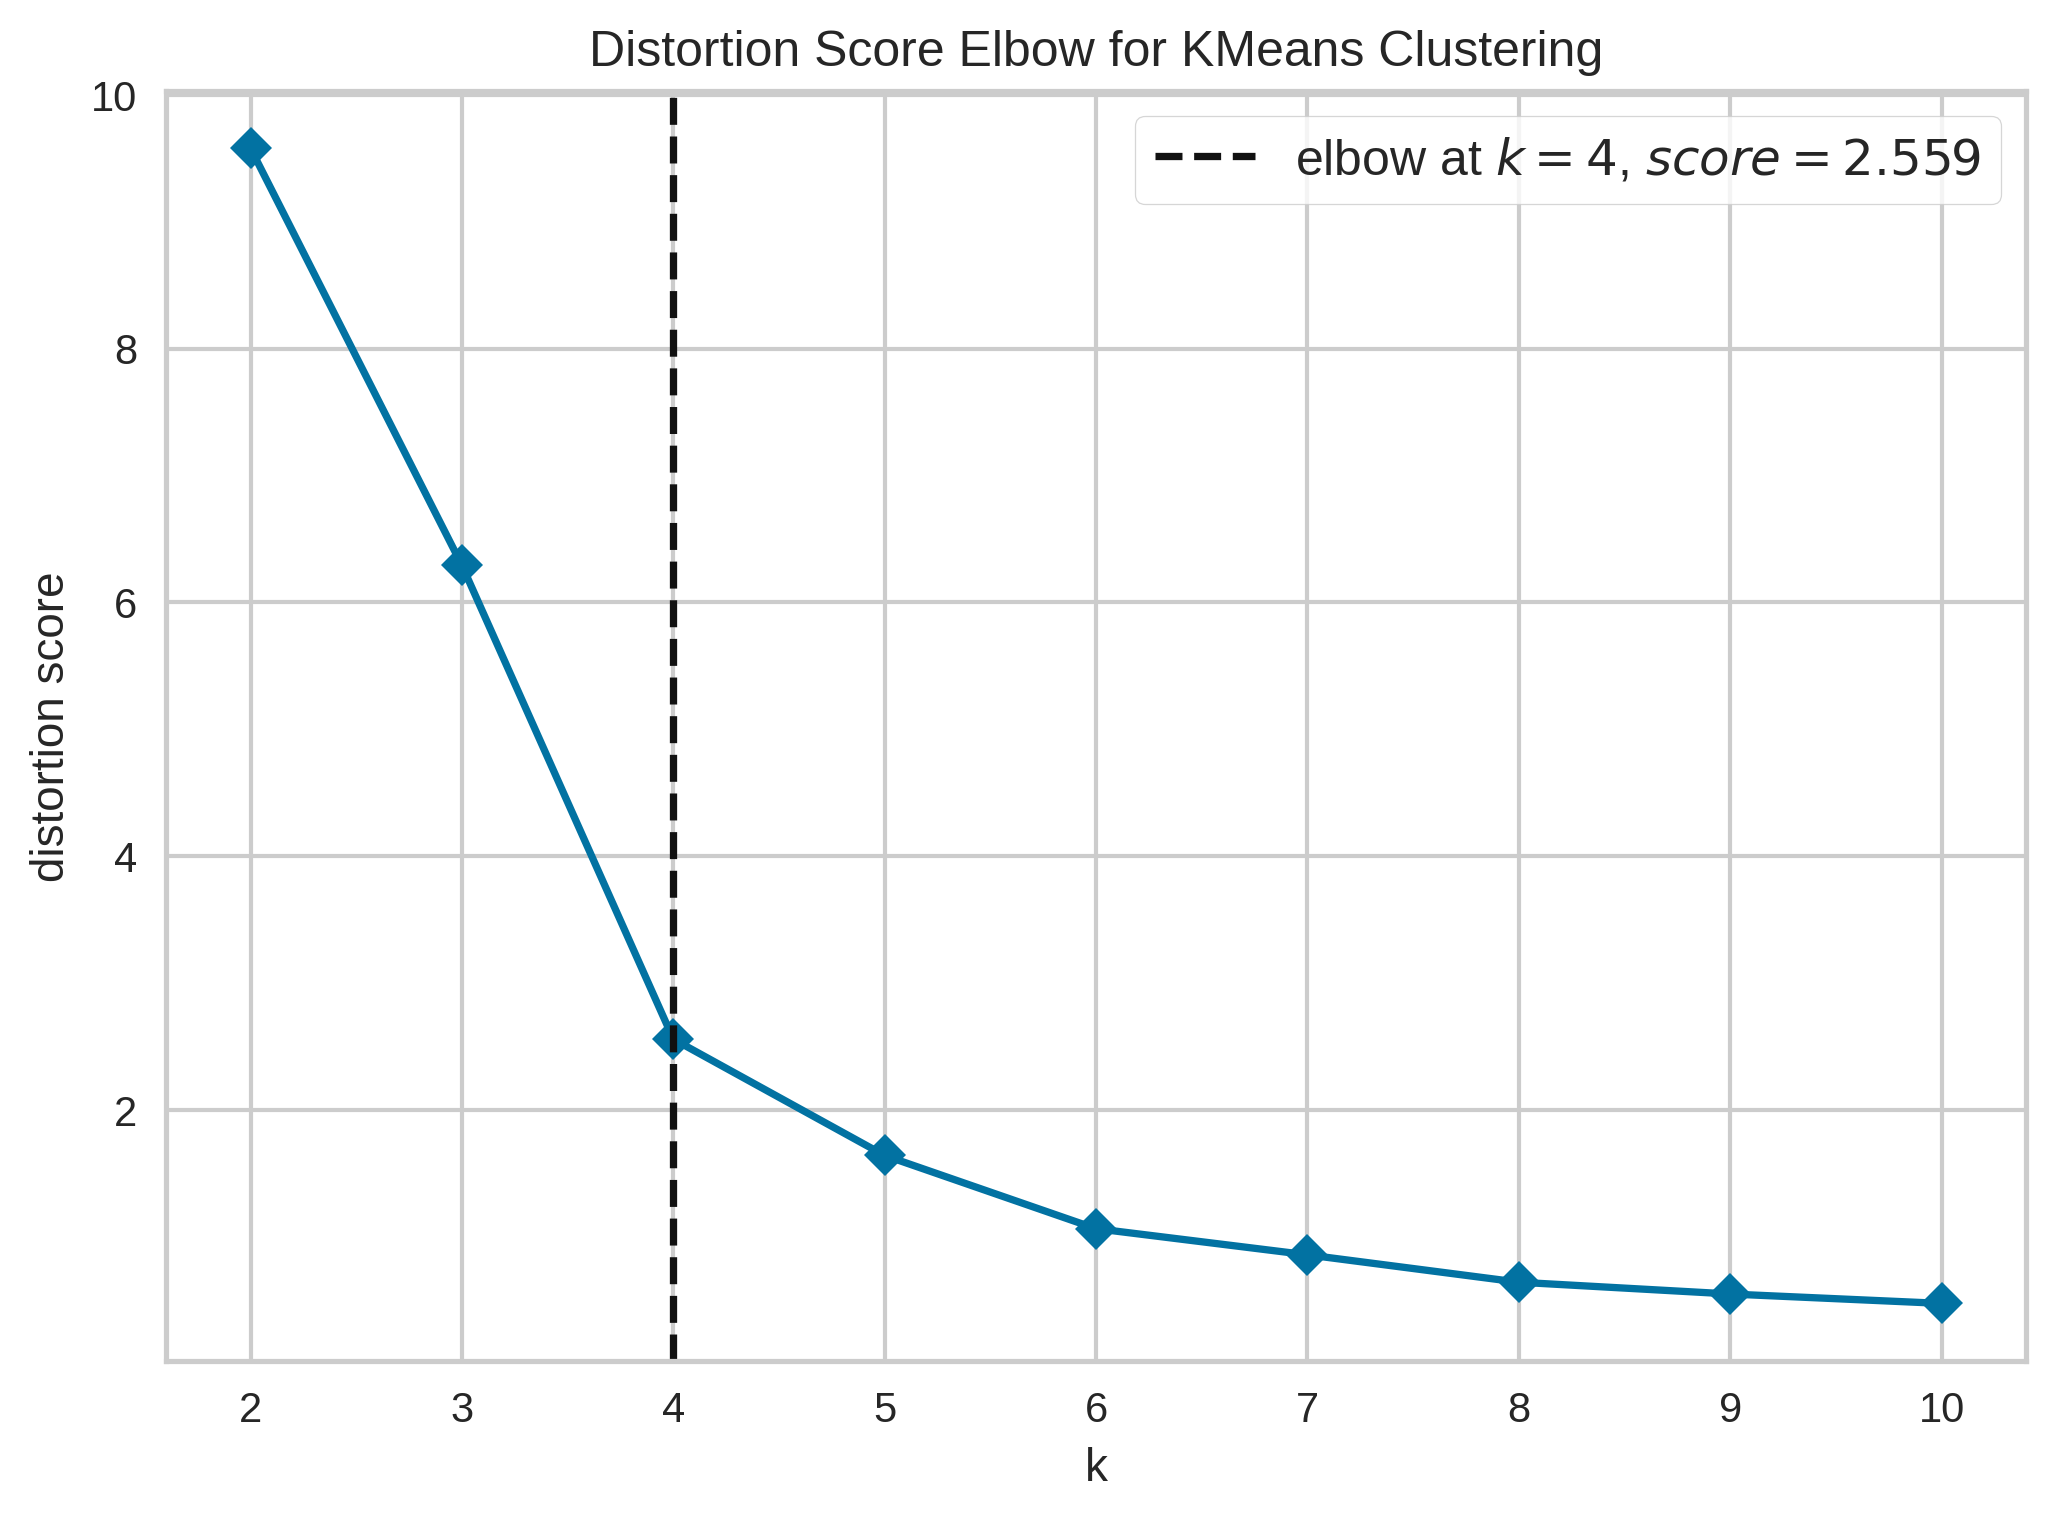

In [ ]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [ ]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [ ]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7149,42172.8080,0.4070,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.500000,Cluster 2
1,0.563186,Cluster 3
2,0.562989,Cluster 3
3,0.500000,Cluster 2
4,0.500000,Cluster 2
5,0.500000,Cluster 2
6,0.500000,Cluster 2
7,0.563186,Cluster 3
8,0.563186,Cluster 3
9,0.500000,Cluster 2


# Fixing df for BPNN to find candidate locations

In [ ]:
HCFAIdf_results

,HCFAI,Cluster
0,0.500000,Cluster 2
1,0.563186,Cluster 3
2,0.562989,Cluster 3
3,0.500000,Cluster 2
4,0.500000,Cluster 2
...,...,...
10512,0.540344,Cluster 3
10513,0.540344,Cluster 3
10514,0.500000,Cluster 2
10515,0.500000,Cluster 2


In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(4):
  cluster_name = f"Cluster {cluster_number}"
  cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
  lists[cluster_name] = cluster_list

In [ ]:
for cluster_name, cluster_list in lists.items():
    # print(f"Cluster {cluster_name}: {cluster_list}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

max, min, total 0.47797325253486633 | 0.415785014629364 | 1907
max, min, total 0.4155519902706146 | 0.3328031301498413 | 1785
max, min, total 0.5325225591659546 | 0.47807931900024414 | 5715
max, min, total 0.6544380187988281 | 0.5327500700950623 | 1110


In [ ]:
x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

,HCFAI,Accessibility Level
322,0.654438,Cluster 3
1578,0.652081,Cluster 3
122,0.651032,Cluster 3
153,0.651032,Cluster 3
185,0.651032,Cluster 3
...,...,...
2999,0.333969,Cluster 1
3000,0.333969,Cluster 1
2690,0.333969,Cluster 1
2689,0.333969,Cluster 1


In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(0))
x = x.replace(['Cluster 3'],int(1))

In [ ]:
x['ID'] = IDdf
x

,HCFAI,Accessibility Level,ID
0,0.500000,0,2971819
1,0.563186,1,2971820
2,0.562989,1,2971821
3,0.500000,0,2973198
4,0.500000,0,2973199
...,...,...,...
10512,0.540344,1,3151422
10513,0.540344,1,3151423
10514,0.500000,0,3151424
10515,0.500000,0,3151425


In [ ]:
df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
# df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI_y,Accessibility Level
0,2971819,Santa Rosa,Santa Fe,Nueva Vizcaya,0.208310,0.459051,0.788850,1.0,0,0,...,48.477583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
1,2971820,Santa Rosa,Santa Fe,Nueva Vizcaya,0.208310,0.459051,0.788850,1.0,0,0,...,49.700157,1.517112,1.166999,19.722437,9.452766,5.018128,5.018128,0.563186,0.563186,1
2,2971821,Santa Rosa,Santa Fe,Nueva Vizcaya,0.208310,0.459051,0.788850,1.0,0,0,...,50.744800,8.336798,7.391221,109.550918,52.319314,27.894692,26.271077,0.562989,0.562989,1
3,2973198,Lawigan,Kayapa,Nueva Vizcaya,0.134009,0.468439,0.711947,1.0,0,0,...,45.206873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
4,2973199,Lawigan,Kayapa,Nueva Vizcaya,0.134009,0.468439,0.711947,1.0,0,0,...,46.230098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10512,3151422,Maligaya,Palanan,Isabela,0.006853,1.705597,0.793593,1.0,0,0,...,66.962931,0.639334,0.293158,5.186404,2.329672,1.113378,1.125852,0.540344,0.540344,1
10513,3151423,Maligaya,Palanan,Isabela,0.006853,1.705597,0.793593,1.0,0,0,...,66.930478,2.237669,1.026053,18.152414,8.153852,3.896823,3.940482,0.540344,0.540344,1
10514,3151424,Maligaya,Palanan,Isabela,0.006853,1.705597,0.793593,1.0,0,0,...,67.053552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
10515,3151425,Dicadyuan,Palanan,Isabela,1.108305,1.755969,0.866171,1.0,0,0,...,67.199882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI,Cluster
0,2971819,Santa Rosa,Santa Fe,Nueva Vizcaya,0.208310,0.459051,0.788850,1.0,0,0,...,48.477583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
1,2971820,Santa Rosa,Santa Fe,Nueva Vizcaya,0.208310,0.459051,0.788850,1.0,0,0,...,49.700157,1.517112,1.166999,19.722437,9.452766,5.018128,5.018128,0.563186,0.563186,1
2,2971821,Santa Rosa,Santa Fe,Nueva Vizcaya,0.208310,0.459051,0.788850,1.0,0,0,...,50.744800,8.336798,7.391221,109.550918,52.319314,27.894692,26.271077,0.562989,0.562989,1
3,2973198,Lawigan,Kayapa,Nueva Vizcaya,0.134009,0.468439,0.711947,1.0,0,0,...,45.206873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
4,2973199,Lawigan,Kayapa,Nueva Vizcaya,0.134009,0.468439,0.711947,1.0,0,0,...,46.230098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10512,3151422,Maligaya,Palanan,Isabela,0.006853,1.705597,0.793593,1.0,0,0,...,66.962931,0.639334,0.293158,5.186404,2.329672,1.113378,1.125852,0.540344,0.540344,1
10513,3151423,Maligaya,Palanan,Isabela,0.006853,1.705597,0.793593,1.0,0,0,...,66.930478,2.237669,1.026053,18.152414,8.153852,3.896823,3.940482,0.540344,0.540344,1
10514,3151424,Maligaya,Palanan,Isabela,0.006853,1.705597,0.793593,1.0,0,0,...,67.053552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
10515,3151425,Dicadyuan,Palanan,Isabela,1.108305,1.755969,0.866171,1.0,0,0,...,67.199882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI_x',
       'HCFAI', 'Cluster'],
      dtype='object')

In [ ]:
df = df.drop(['HCFAI_x'], axis=1)
df.rename(columns = {'Accessibility Level_x':'Cluster'}, inplace = True)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI,Cluster
0,2971819,Santa Rosa,Santa Fe,Nueva Vizcaya,0.208310,0.459051,0.788850,1.0,0,0,...,3010498,48.477583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
1,2971820,Santa Rosa,Santa Fe,Nueva Vizcaya,0.208310,0.459051,0.788850,1.0,0,0,...,3010498,49.700157,1.517112,1.166999,19.722437,9.452766,5.018128,5.018128,0.563186,1
2,2971821,Santa Rosa,Santa Fe,Nueva Vizcaya,0.208310,0.459051,0.788850,1.0,0,0,...,3010498,50.744800,8.336798,7.391221,109.550918,52.319314,27.894692,26.271077,0.562989,1
3,2973198,Lawigan,Kayapa,Nueva Vizcaya,0.134009,0.468439,0.711947,1.0,0,0,...,3010498,45.206873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
4,2973199,Lawigan,Kayapa,Nueva Vizcaya,0.134009,0.468439,0.711947,1.0,0,0,...,3010498,46.230098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10512,3151422,Maligaya,Palanan,Isabela,0.006853,1.705597,0.793593,1.0,0,0,...,3086463,66.962931,0.639334,0.293158,5.186404,2.329672,1.113378,1.125852,0.540344,1
10513,3151423,Maligaya,Palanan,Isabela,0.006853,1.705597,0.793593,1.0,0,0,...,3086463,66.930478,2.237669,1.026053,18.152414,8.153852,3.896823,3.940482,0.540344,1
10514,3151424,Maligaya,Palanan,Isabela,0.006853,1.705597,0.793593,1.0,0,0,...,3086463,67.053552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
10515,3151425,Dicadyuan,Palanan,Isabela,1.108305,1.755969,0.866171,1.0,0,0,...,3086463,67.199882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0


# export

In [ ]:
df.to_csv(f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}_clusters.csv')